In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [23]:
seoul_csv = pd.read_csv('seoul.csv')
seoul_csv.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차객수
0,20240701,9호선2~3단계,석촌고분,7665,7414,15079
1,20240701,중앙선,도농,12178,10957,23135
2,20240701,중앙선,구리,14053,14085,28138
3,20240701,4호선,길음,22687,22215,44902
4,20240701,분당선,복정,1,0,1


In [24]:
seoul_csv['승하차객수']

0        15079
1        23135
2        28138
3        44902
4            1
         ...  
19098    22158
19099    18694
19100    31356
19101    94945
19102    44007
Name: 승하차객수, Length: 19103, dtype: int64

In [25]:
seoul_csv.shape[0]

19103

In [26]:
counts = seoul_csv.shape[0]
stations = set()
dict_count_of_people_on_station = dict()

for i in range(0, counts):
    stations.add(seoul_csv.iloc[i]['역명'])

for station in stations:
    dict_count_of_people_on_station[station] = 0

print(stations)
print(dict_count_of_people_on_station)

{'남태령', '성신여대입구(돈암)', '행신', '한국항공대', '신림', '서울역', '일원', '선정릉', '영등포시장', '달월', '능곡', '오이도', '이촌(국립중앙박물관)', '용문', '금정', '수락산', '군자(능동)', '하남검단산', '양원', '노들', '범계', '용답', '관악산(서울대)', '신논현', '배방', '대림(구로구청)', '구일', '영통', '남성', '목동', '도봉산', '평내호평', '탕정', '진위', '교대(법원.검찰청)', '구룡', '춘천', '상왕십리', '방배', '팔당', '오목천', '자양(뚝섬한강공원)', '언주', '풍산', '장한평', '봉천', '인천', '연신내', '원당', '오금', '증미', '사평', '아산', '수내', '동두천', '대흥(서강대앞)', '보라매', '명일', '오산', '봉은사', '신원', '곡산', '홍제', '용마산(용마폭포공원)', '남동인더스파크', '역삼', '회기', '독립문', '장암', '양평', '갈매', '원인재', '관악', '덕정', '방이', '독산', '부천종합운동장', '대성리', '대청', '오산대', '서울숲', '옥수', '청담', '아차산(어린이대공원후문)', '양주', '종각', '화계', '이매', '망포', '월롱', '서초', '야탑', '강매', '광운대', '신당', '동대문', '도심', '가천대', '의왕', '동묘앞', '상수', '소사', '독바위', '논현', '구성', '노량진', '당산', '덕소', '송파', '양천향교', '신방화', '수색', '상갈', '마장', '두정', '하남풍산', '신목동', '한남', '마들', '김포공항', '도화', '망월사', '사릉', '마두', '숙대입구(갈월)', '주안', '단대오거리', '부천', '월곶', '송파나루', '무악재', '국회의사당', '미금', '청산', '삼송', '면목', '동두천중앙', '홍대입구', '소요산', '보정', '화랑대(서울

In [27]:
for i in range(0, counts):
    current = seoul_csv.iloc[i]
    station = current['역명']
    # station = seoul_csv.iloc[i]['역명'] 와 동일
    
    dict_count_of_people_on_station[station] = dict_count_of_people_on_station[station] + current['승하차객수']
print(dict_count_of_people_on_station)

{'남태령': 77175, '성신여대입구(돈암)': 1479751, '행신': 478898, '한국항공대': 110185, '신림': 3398688, '서울역': 5784623, '일원': 633844, '선정릉': 1054916, '영등포시장': 690855, '달월': 5171, '능곡': 274553, '오이도': 471927, '이촌(국립중앙박물관)': 802995, '용문': 138883, '금정': 1654213, '수락산': 746596, '군자(능동)': 1538127, '하남검단산': 396067, '양원': 180522, '노들': 271425, '범계': 1629136, '용답': 171683, '관악산(서울대)': 193895, '신논현': 1912312, '배방': 73877, '대림(구로구청)': 2043665, '구일': 600023, '영통': 534076, '남성': 665355, '목동': 1014396, '도봉산': 972681, '평내호평': 350373, '탕정': 96461, '진위': 96922, '교대(법원.검찰청)': 2796443, '구룡': 215043, '춘천': 79770, '상왕십리': 862692, '방배': 920624, '팔당': 55207, '오목천': 220950, '자양(뚝섬한강공원)': 545756, '언주': 708118, '풍산': 363813, '장한평': 1140784, '봉천': 1420430, '인천': 303517, '연신내': 1999554, '원당': 635558, '오금': 592222, '증미': 468922, '사평': 242598, '아산': 215021, '수내': 833198, '동두천': 98843, '대흥(서강대앞)': 540377, '보라매': 647793, '명일': 537653, '오산': 612254, '봉은사': 1377784, '신원': 10428, '곡산': 40313, '홍제': 1033839, '용마산(용마폭포공원)': 336893, '남동인더스파크

In [28]:
for station in stations:
    dict_count_of_people_on_station[station] = dict_count_of_people_on_station[station] / 2
print(dict_count_of_people_on_station)

{'남태령': 38587.5, '성신여대입구(돈암)': 739875.5, '행신': 239449.0, '한국항공대': 55092.5, '신림': 1699344.0, '서울역': 2892311.5, '일원': 316922.0, '선정릉': 527458.0, '영등포시장': 345427.5, '달월': 2585.5, '능곡': 137276.5, '오이도': 235963.5, '이촌(국립중앙박물관)': 401497.5, '용문': 69441.5, '금정': 827106.5, '수락산': 373298.0, '군자(능동)': 769063.5, '하남검단산': 198033.5, '양원': 90261.0, '노들': 135712.5, '범계': 814568.0, '용답': 85841.5, '관악산(서울대)': 96947.5, '신논현': 956156.0, '배방': 36938.5, '대림(구로구청)': 1021832.5, '구일': 300011.5, '영통': 267038.0, '남성': 332677.5, '목동': 507198.0, '도봉산': 486340.5, '평내호평': 175186.5, '탕정': 48230.5, '진위': 48461.0, '교대(법원.검찰청)': 1398221.5, '구룡': 107521.5, '춘천': 39885.0, '상왕십리': 431346.0, '방배': 460312.0, '팔당': 27603.5, '오목천': 110475.0, '자양(뚝섬한강공원)': 272878.0, '언주': 354059.0, '풍산': 181906.5, '장한평': 570392.0, '봉천': 710215.0, '인천': 151758.5, '연신내': 999777.0, '원당': 317779.0, '오금': 296111.0, '증미': 234461.0, '사평': 121299.0, '아산': 107510.5, '수내': 416599.0, '동두천': 49421.5, '대흥(서강대앞)': 270188.5, '보라매': 323896.5, '명일': 268826.5, '

In [29]:
def std_dev_by_station(data, target_station):
    station_data_list = (seoul_csv[seoul_csv['역명'] == target_station])

    f_item = target_station
    f_data = station_data_list

    np_data = f_data.select_dtypes(include=np.number)
    np_data_values = np_data.values
    np_data_values
    # print(np_data_values)

    np_data_count = len(np_data_values)
    count_list = []
    for i in range(0, np_data_count):
        count_list.append(np_data_values[i][3])
    # print(count_list)

    std_dev = np.std(count_list)

    return (f_item, std_dev)

In [30]:
for station in stations:
    f_item, std_dev = std_dev_by_station(seoul_csv, station)
    print(f_item, std_dev)

남태령 450.30254137869616
성신여대입구(돈암) 16918.874352882536
행신 2871.2110335479583
한국항공대 874.8552524841853
신림 51514.54448132708
서울역 35385.734274958624
일원 6355.698818328541
선정릉 6371.042501970511
영등포시장 4207.974683693525
달월 38.91630337087671
능곡 1558.3347157682033
오이도 1774.0493290357622
이촌(국립중앙박물관) 6164.685120592632
용문 1207.6194485723715
금정 10341.234708815462
수락산 3412.864731473867
군자(능동) 4914.679820076885
하남검단산 1385.5657409435998
양원 1404.3025635191111
노들 1553.738873489595
범계 9002.831711188386
용답 926.9733648529077
관악산(서울대) 999.806993861308
신논현 11406.902576018265
배방 277.89064244254064
대림(구로구청) 15320.505019831922
구일 10291.798657102416
영통 2996.1986342669857
남성 4240.661641433798
목동 7744.531993351554
도봉산 3912.340939607837
평내호평 2152.3019267209957
탕정 471.4588579448385
진위 634.5969445229931
교대(법원.검찰청) 25099.4376760673
구룡 1681.6526192224637
춘천 513.7766371512179
상왕십리 5922.119371663935
방배 7479.0568960337705
팔당 306.7668802764525
오목천 1333.2679418581552
자양(뚝섬한강공원) 2475.7907239176816
언주 6710.00493183304
풍산 1693.49

In [31]:
station_name_list = []
people_count_of_station_list = []
dict_list = dict()
for station in stations:
    station_name_list.append(station)
    station_people_sum = (seoul_csv[seoul_csv['역명'] == station]['승하차객수']).sum()
    people_count_of_station_list.append(station_people_sum)
    dict_list[station] = station_people_sum

print(dict_list)

{'남태령': 77175, '성신여대입구(돈암)': 1479751, '행신': 478898, '한국항공대': 110185, '신림': 3398688, '서울역': 5784623, '일원': 633844, '선정릉': 1054916, '영등포시장': 690855, '달월': 5171, '능곡': 274553, '오이도': 471927, '이촌(국립중앙박물관)': 802995, '용문': 138883, '금정': 1654213, '수락산': 746596, '군자(능동)': 1538127, '하남검단산': 396067, '양원': 180522, '노들': 271425, '범계': 1629136, '용답': 171683, '관악산(서울대)': 193895, '신논현': 1912312, '배방': 73877, '대림(구로구청)': 2043665, '구일': 600023, '영통': 534076, '남성': 665355, '목동': 1014396, '도봉산': 972681, '평내호평': 350373, '탕정': 96461, '진위': 96922, '교대(법원.검찰청)': 2796443, '구룡': 215043, '춘천': 79770, '상왕십리': 862692, '방배': 920624, '팔당': 55207, '오목천': 220950, '자양(뚝섬한강공원)': 545756, '언주': 708118, '풍산': 363813, '장한평': 1140784, '봉천': 1420430, '인천': 303517, '연신내': 1999554, '원당': 635558, '오금': 592222, '증미': 468922, '사평': 242598, '아산': 215021, '수내': 833198, '동두천': 98843, '대흥(서강대앞)': 540377, '보라매': 647793, '명일': 537653, '오산': 612254, '봉은사': 1377784, '신원': 10428, '곡산': 40313, '홍제': 1033839, '용마산(용마폭포공원)': 336893, '남동인더스파크

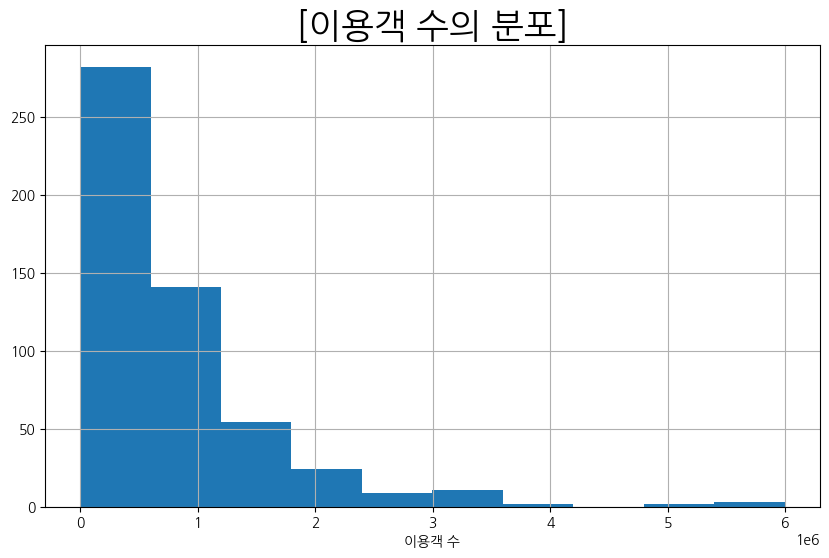

In [38]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
_df = pd.DataFrame(people_count_of_station_list, index=station_name_list)

ax1.hist(_df)
ax1.set_title('[이용객 수의 히스토그램 분포]', size=25)
ax1.set_xlabel('이용객 수')
ax1.grid()
plt.show()

In [51]:
checking = pd.DataFrame(dict_list.values(), index=dict_list.keys(), columns=['이용객 수'])
checking

,이용객 수
남태령,77175
성신여대입구(돈암),1479751
행신,478898
한국항공대,110185
신림,3398688
...,...
건대입구,3014756
운서,595253
미아사거리,1591434
도농,620190


In [55]:
checking.sort_values('이용객 수')

,이용객 수
까치울,1
운천,315
임진강,1587
지평,3939
백양리,5109
...,...
강남,4889467
고속터미널,5045712
홍대입구,5773017
서울역,5784623


In [60]:
# 가장 많은 이용객이 있는 역의 이용객 수 / 이용객 수가 가장 많은 역의 이름
biggest = checking.sort_values('이용객 수', ascending=False).iloc[0]
biggest

이용객 수    5993237
Name: 잠실(송파구청), dtype: int64

In [61]:
# 가장 적은 이용객이 있는 역의 이용객 수 / 이용객 수가 가장 적은 역의 이름
smallest = checking.sort_values('이용객 수').iloc[0]
smallest

이용객 수    1
Name: 까치울, dtype: int64